In [49]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import FloatSlider
from ipywidgets import interact
import ipywidgets as widgets

$$
\chi({q}) = \frac{2\pi}{\lambda} \left( \frac{1}{4} C_s \lambda^4 q^4 - \frac{1}{2} \Delta f \lambda^2 q^2 \right)
$$

may be simplified by...
$$
\chi({q}) = \pi \lambda q^2 \left( \frac{1}{2} C_s \lambda q^2 - \Delta f \right)
$$

## Parameters

In [50]:
size = 257 # Image Size
resolution = 0.8
kV = 300.0
cs = 2.7 * 1e7  # input in mm converted in angstrom
amplitudeContrast = 0.1

## Calculating wavelength from electron beam energy (keV) 

In [51]:
import scipy.constants

h = scipy.constants.Planck
e = scipy.constants.elementary_charge
c = scipy.constants.speed_of_light
m0 = scipy.constants.electron_mass

U = kV * 1000 # Convert kiloVolt in Volt

wavelength = h / np.sqrt(2.0 * m0 * e * U) / np.sqrt( 1 + e * U / (2 * m0 * c**2)) * 1e10

In [52]:
print(h,e,c,m0)
print(wavelength)

6.62607015e-34 1.602176634e-19 299792458.0 9.1093837015e-31
0.01968748900684879


## CTF in 1D - Defocus

In [80]:
%matplotlib inline

widget = widgets.FloatSlider(
    value=5000,
    min=5000.0,
    max=10000.0,
    step=5,
    description='Defocus (A):'
)

def plot(defocus):
    ax = np.linspace(0, 1.0/(2.0 * resolution), size)
    w1 = np.sqrt(1.0 - amplitudeContrast**2)
    chi = np.pi * wavelength * ax**2 * (cs * wavelength**2 * ax**2 / 2.0 - defocus)
    plt.plot(ax, w1 * np.sin(chi))

widgets.interact(plot,defocus = widget)

interactive(children=(FloatSlider(value=5000.0, description='Defocus (A):', max=10000.0, min=5000.0, step=5.0)…

<function __main__.plot(defocus)>

## CTF in 2D - Defocus

### Parameters

In [54]:
widget = widgets.FloatSlider(
    value=5000,
    min=5000.0,
    max=10000.0,
    step=5,
    description='Defocus (A):'
)

def plot2d(defocus):
    ax = np.linspace(-1.0 / (2.0 * resolution), 1.0/(2.0 * resolution), size)
    mx, my = np.meshgrid(ax, ax)
    mag = np.sqrt(mx ** 2 + my ** 2)
    w1 = np.sqrt(1.0 - amplitudeContrast**2)
    w2 = amplitudeContrast
    chi = 2 * np.pi * cs * wavelength**3 * mag**4 / 4.0 - 2.0 * np.pi * defocus * wavelength * mag**2 / 2.0
    plt.imshow(-w1 * np.sin(chi) - w2 * np.cos(chi),cmap='gray')

widgets.interact(plot2d,defocus = widget)

interactive(children=(FloatSlider(value=5000.0, description='Defocus (A):', max=10000.0, min=5000.0, step=5.0)…

<function __main__.plot2d(defocus)>

## CTF in 2D - Defocus + astigmatism

$$
\chi({q,\alpha}) = \frac{2\pi}{\lambda} \left( \frac{1}{4} C_s \lambda^4 q^4 - \frac{1}{2} \Delta f(\alpha) \lambda^2 q^2 \right)
$$

avec

$$
\Delta f(\alpha) = \Delta f - A_1 cos(2(\alpha - \alpha_1) )
$$


### Parameters

In [55]:
defocusU = 7000
defocusV = 5000
sim_ctf_defocus_stdev = 0.1
angleAstigmatism = 30.0 / 180.0 * np.pi # converted in radians

## Init image with frequency magnitude

In [56]:
ax = np.linspace(-1.0 / (2.0 * resolution), 1.0/(2.0 * resolution), size)
mx, my = np.meshgrid(ax, ax)
r2 = mx ** 2 + my ** 2
r = np.sqrt(r2)
angleFrequency = np.arctan2(my, mx)

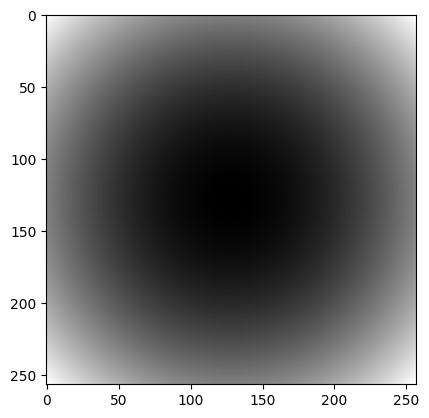

In [57]:
plt.imshow(r2, cmap='gray')

In [58]:
ac = amplitudeContrast
pc = np.sqrt(1.0 - ac**2)
K1 = np.pi / 2.0 * cs * wavelength**3
K2 = np.pi * wavelength

angle = angleFrequency - angleAstigmatism
local_defocus = (defocusU + defocusV + (defocusU - defocusV) * np.cos(2.0 * angle) ) / 2.0

chi2d = K1 * r2**2 - K2 * r2 * local_defocus

hFourier = -pc * np.sin(chi2d) - ac * np.cos(chi2d)

(257, 257)


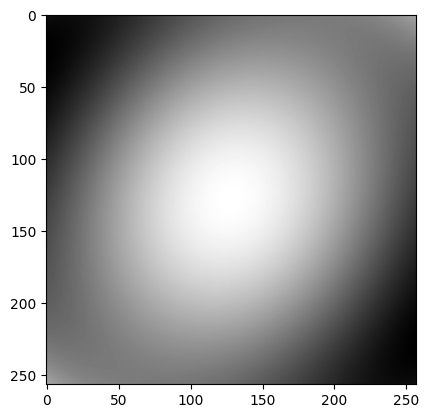

In [59]:
print(chi2d.shape)
plt.imshow(chi2d,cmap='gray')

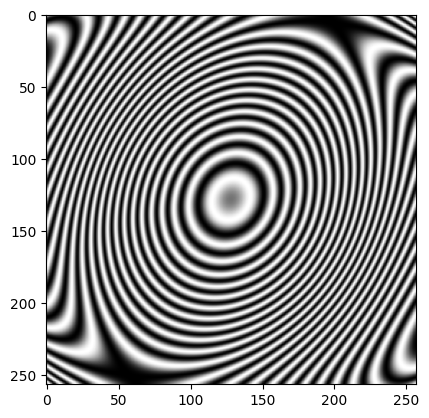

In [60]:
plt.imshow(hFourier,cmap='gray')

## CTF in 2D - Envelope Function

In [61]:
# Enveloppe function
valueNyquist = 0.001
bFactor=0.0

In [62]:
frequency = 1.0 / resolution

decay = np.sqrt(-np.log(valueNyquist)) * 2.0 * resolution
envelope = np.exp(-frequency * decay ** 2 * r2)
result = hFourier * envelope

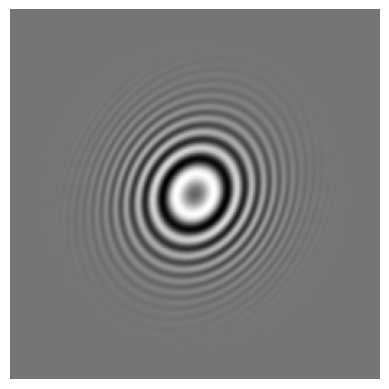

In [78]:
plt.axis('off')
plt.imshow(result,cmap='gray')
plt.savefig('test.png',  bbox_inches='tight',pad_inches = 0)

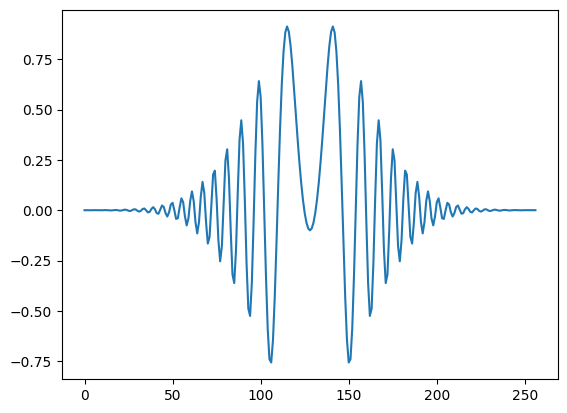

In [64]:
plt.plot(result[128])